## Spain: Electricity Mix

In [41]:
import json, pandas as pd
from pathlib import Path


In [42]:

# Paths to the two Spanish generation‑mix JSON files
files = [
    Path("..") / "data" / "generation_data" / "gen_SP_1.json",
    Path("..") / "data" / "generation_data" / "gen_SP_2.json",
]

rows = []
for fp in files:
    with open(fp, "r", encoding="utf-8") as f:
        js = json.load(f)

    # Each technology is in `included`; its daily series is under attributes → values
    for tech in js.get("included", []):
        tech_name = tech["attributes"]["title"]  # e.g. "Hidráulica"
        for v in tech["attributes"].get("values", []):
            rows.append(
                {
                    "datetime": v["datetime"][:10],  # keep date part YYYY‑MM‑DD
                    "technology": tech_name,
                    "value": v["value"],
                }
            )

# Long → wide
df_long = pd.DataFrame(rows)
df_long["datetime"] = pd.to_datetime(df_long["datetime"])

df_wide = (
    df_long.pivot_table(
        index="datetime", columns="technology", values="value", aggfunc="sum"
    )
    .sort_index()
)

df_wide.head()


technology,Carbón,Ciclo combinado,Cogeneración,Eólica,Fuel + Gas,Generación total,Hidroeólica,Hidráulica,Motores diésel,Nuclear,Otras renovables,Residuos no renovables,Residuos renovables,Solar fotovoltaica,Solar térmica,Turbina de gas,Turbina de vapor
datetime,,,,,,,,,,,,,,,,,
2021-05-21,10704.287,73001.855,74625.031,155894.865,NaN,644980.744,143.171,73883.825,5279.083,119965.517,12369.130,5130.6420,1018.6720,83705.870,25501.607,870.342,2886.847
2021-05-22,10774.967,66884.692,70269.685,127623.325,NaN,589408.240,140.081,77443.693,4888.217,120171.870,13214.733,5166.8165,1005.4995,72179.886,16774.223,827.658,2042.894
2021-05-23,11510.497,71942.040,69718.071,128453.671,NaN,549018.679,134.624,55731.601,4809.192,120347.046,13563.270,5146.5330,1043.2990,50523.534,13002.416,967.950,2124.935
2021-05-24,16967.108,54120.475,73956.059,182665.421,NaN,646010.515,140.599,63902.700,5541.004,120062.731,13433.646,5164.7735,1006.8415,83806.643,22112.340,925.268,2204.906
2021-05-25,17693.930,82573.520,74239.310,141667.500,NaN,647615.565,142.516,68739.725,5671.966,120118.612,13251.959,5367.5240,1023.0020,87685.132,26520.215,738.709,2181.945


In [85]:
df_aux = df_wide.reset_index()
min_date, max_date = df_aux["datetime"].min().date().isoformat(), df_aux["datetime"].max().date().isoformat()
print(min_date,  max_date)

2021-05-21 2025-04-30


In [87]:

# --- guardar ----------------------------------------------------
out_path = Path("..") / "data" / "generation_data" / f"eco2mix_SP_daily_{min_date}_{max_date}.csv"
out_path.parent.mkdir(parents=True, exist_ok=True)
df_wide.to_csv(out_path, index=False, encoding="utf-8")

print("CSV diario guardado en:", out_path.resolve())
df_wide.head()

CSV diario guardado en: C:\Users\frolo\Documentos\PythonProjects\volatility-spillovers\data\generation_data\eco2mix_SP_daily_2021-05-21_2025-04-30.csv


technology,Carbón,Ciclo combinado,Cogeneración,Eólica,Fuel + Gas,Generación total,Hidroeólica,Hidráulica,Motores diésel,Nuclear,Otras renovables,Residuos no renovables,Residuos renovables,Solar fotovoltaica,Solar térmica,Turbina de gas,Turbina de vapor
datetime,,,,,,,,,,,,,,,,,
2021-05-21,10704.287,73001.855,74625.031,155894.865,NaN,644980.744,143.171,73883.825,5279.083,119965.517,12369.130,5130.6420,1018.6720,83705.870,25501.607,870.342,2886.847
2021-05-22,10774.967,66884.692,70269.685,127623.325,NaN,589408.240,140.081,77443.693,4888.217,120171.870,13214.733,5166.8165,1005.4995,72179.886,16774.223,827.658,2042.894
2021-05-23,11510.497,71942.040,69718.071,128453.671,NaN,549018.679,134.624,55731.601,4809.192,120347.046,13563.270,5146.5330,1043.2990,50523.534,13002.416,967.950,2124.935
2021-05-24,16967.108,54120.475,73956.059,182665.421,NaN,646010.515,140.599,63902.700,5541.004,120062.731,13433.646,5164.7735,1006.8415,83806.643,22112.340,925.268,2204.906
2021-05-25,17693.930,82573.520,74239.310,141667.500,NaN,647615.565,142.516,68739.725,5671.966,120118.612,13251.959,5367.5240,1023.0020,87685.132,26520.215,738.709,2181.945


## Portugal: Electricity Mix

In [43]:
# Imports and API


import requests, time, json
import pandas as pd
from datetime import datetime, timedelta
from tqdm.notebook import tqdm   
import matplotlib.pyplot as plt
from requests.adapters import HTTPAdapter, Retry
from pathlib import Path



%matplotlib inline



In [44]:
API = ("https://servicebus.ren.pt/datahubapi/electricity/"
       "ElectricityConsumptionSupplyDaily")

# ▶️ sesión con reintentos exponenciales
def make_session(retries=5, backoff=0.5) -> requests.Session:
    retry = Retry(
        total=retries,             # nº máx. de reintentos
        backoff_factor=backoff,    # 0.5 → 0.5s, 1s, 2s, 4s…
        status_forcelist=[500, 502, 503, 504],
        allowed_methods=["GET"]
    )
    adapter = HTTPAdapter(max_retries=retry)
    sess = requests.Session()
    sess.mount("https://", adapter)
    return sess

session = make_session()

def fetch_day(date_str, culture="pt-PT", read_timeout=60):
    url = f"{API}?culture={culture}&date={date_str}"
    r = session.get(url, timeout=(10, read_timeout))  # 10 s para conectar, 60 s para leer
    r.raise_for_status()
    data = r.json()
    if not data or isinstance(data, dict):
        return None
    df = pd.DataFrame(data)
    df["date"] = pd.to_datetime(date_str)
    return df

In [45]:
start = datetime(2021, 5, 21)
end   = datetime(2025, 4, 30)

frames = []
for day in tqdm(list(daterange(start, end)), desc="Descargando"):
    df = fetch_day(day.strftime("%Y-%m-%d"))
    if df is not None:
        frames.append(df)
    time.sleep(0.3)   # evita sobrecargar el servidor

consumo_raw = pd.concat(frames, ignore_index=True)
print(f"{len(consumo_raw)} filas descargadas.")



Descargando:   0%|          | 0/1441 [00:00<?, ?it/s]

36242 filas descargadas.


In [46]:
pivot = consumo_raw.pivot_table(index="date",
                                columns="type",
                                values="daily_Accumulation",
                                aggfunc="sum").fillna(0)

pivot.head()          # primera vista


type,BIOMASSA,BIOMASSA_COGERACAO,BIOMASSA_OUTROS,CARVAO,CONSUMO,CONSUMO_ARMAZENAMENTO,CONSUMO_BATERIAS,CONSUMO_BOMBAGEM,CORRIGIDO_TEMPERATURA,EOLICA,...,OUTRA_TERMICA,OUTRA_TERMICA_COGERACAO,OUTRA_TERMICA_OUTROS,PRODUCAO_ARMAZENAMENTO,PRODUCAO_BOMBAGEM,PRODUCAO_NAO_RENOVAVEL,PRODUCAO_RENOVAVEL,PRODUCAO_TOTAL,SALDO_IMPORTADOR,SOLAR
date,,,,,,,,,,,,,,,,,,,,,
2021-05-21,10.0,5.0,5.0,0.0,133.0,5.0,0.0,5.0,133.0,45.0,...,1.0,0.0,1.0,6.0,6.0,42.0,71.0,119.0,19.0,6.0
2021-05-22,10.0,5.0,5.0,0.0,117.0,5.0,0.0,5.0,117.0,49.0,...,1.0,0.0,1.0,5.0,5.0,10.0,80.0,95.0,27.0,5.0
2021-05-23,9.0,5.0,5.0,0.0,108.0,13.0,0.0,13.0,108.0,59.0,...,1.0,0.0,1.0,2.0,2.0,8.0,84.0,95.0,27.0,7.0
2021-05-24,9.0,4.0,5.0,0.0,129.0,13.0,0.0,13.0,129.0,47.0,...,1.0,0.0,1.0,5.0,5.0,22.0,77.0,104.0,38.0,5.0
2021-05-25,8.0,3.0,5.0,0.0,133.0,0.0,0.0,0.0,133.0,35.0,...,1.0,0.0,1.0,10.0,10.0,44.0,68.0,123.0,10.0,6.0


In [47]:
# build the path one level up, inside data/generation_data
out_path = Path("..") / "data" / "generation_data"
out_path.mkdir(parents=True, exist_ok=True)   # creates ../data/generation_data/

pivot.to_csv(out_path / "consumo_PT_2021-05-21_2023-04-30.csv",
             encoding="utf-8",
             index=False)




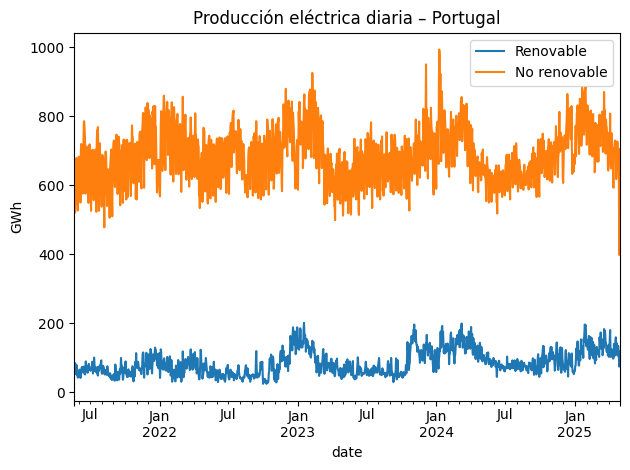

In [48]:
# Ejemplo: pila apilada de producción renovable vs. no renovable
ren = ["EOLICA", "HIDRICA", "SOLAR", "BIOMASSA"]
non_ren = [c for c in pivot.columns if c not in ren]

pivot[ren].sum(axis=1).plot(label="Renovable")
pivot[non_ren].sum(axis=1).plot(label="No renovable")
plt.title("Producción eléctrica diaria – Portugal")
plt.ylabel("GWh")
plt.legend()
plt.tight_layout()
plt.show()

## France: Electricity Mix

In [ ]:
import requests, pprint, json, pandas as pd, datetime as dt
from tqdm.notebook import tqdm
import datetime as dt
import numpy as np
import pathlib as Path

In [72]:
BASE = "https://odre.opendatasoft.com/api/v2/catalog/datasets"
DATASET = "eco2mix-national-cons-def"

FIELDS = [
    "date_heure",          # marca de tiempo
    "consommation",        # carga total
    # Renovables
    "eolien",
    "solaire",
    # Hidráulica (suma de sub-tipos más abajo)
    "hydraulique_fil_eau_eclusee",
    "hydraulique_lacs",
    "hydraulique_step_turbinage",
    # Fósiles
    "gaz_tac", "gaz_cogen", "gaz_ccg", "gaz_autres",
    "fioul_tac", "fioul_cogen", "fioul_autres",
    "charbon",
    # Nuclear
    "nucleaire",
    # Bioenergías
    "bioenergies_dechets", "bioenergies_biogaz", "bioenergies_biomasse",
    # Intercambios y CO₂ (opcional)
    "ech_physiques", "taux_co2"
]



In [73]:
# ───────────────────────── helpers ──────────────────────────
def api_records(params, timeout=60):
    """Devuelve lista de dicts con los 'fields'."""
    url = f"{BASE}/{DATASET}/records"
    r   = requests.get(url, params=params, timeout=timeout)
    js  = r.json()
    if r.status_code != 200 or "error" in js:
        raise RuntimeError(f"[{r.status_code}] {js.get('error', js)}")
    # 'records' → cada elem. → 'record' → 'fields'
    return [rec["record"]["fields"] for rec in js.get("records", [])]


def dataset_bounds():
    earliest = api_records({"select":"date_heure",
                            "order_by":"date_heure", "limit":1})[0]["date_heure"]
    latest   = api_records({"select":"date_heure",
                            "order_by":"date_heure desc", "limit":1})[0]["date_heure"]
    return earliest, latest


def fetch_interval(start_iso, end_iso, batch=100, pbar=None):
    rows, offset = [], 0
    while True:
        page = api_records({
            "select": ",".join(FIELDS),
            "where": f"date_heure >= '{start_iso}' AND date_heure < '{end_iso}'",
            "order_by": "date_heure",
            "limit": batch,
            "offset": offset,
            "timezone": "Europe/Paris"
        })
        if not page:
            if offset == 0:
                print(f"⚠️ sin filas {start_iso}→{end_iso}")
            break
        rows.extend(page)
        offset += batch
        if pbar:
            pbar.update(len(page))
        if len(page) < batch:
            break
    return pd.DataFrame(rows)

In [74]:
t0, t1 = dt.date(2021, 5, 21), dt.date(2023, 4, 30)
step   = dt.timedelta(days=31)

frames = []
for cur in tqdm(pd.date_range(t0, t1, freq="MS"), desc="Meses", unit="mes"):
    nxt = min(cur.date()+step, t1+dt.timedelta(days=1))
    with tqdm(total=0, desc=str(cur.date()), unit="rows", leave=False) as pb:
        df = fetch_interval(cur.date().isoformat(), nxt.isoformat(), batch=100, pbar=pb)
    if not df.empty:
        frames.append(df)

raw = pd.concat(frames, ignore_index=True)
print("Total filas descargadas:", len(raw))

Meses:   0%|          | 0/23 [00:00<?, ?mes/s]

2021-06-01: 0rows [00:00, ?rows/s]

2021-07-01: 0rows [00:00, ?rows/s]

2021-08-01: 0rows [00:00, ?rows/s]

2021-09-01: 0rows [00:00, ?rows/s]

2021-10-01: 0rows [00:00, ?rows/s]

2021-11-01: 0rows [00:00, ?rows/s]

2021-12-01: 0rows [00:00, ?rows/s]

2022-01-01: 0rows [00:00, ?rows/s]

2022-02-01: 0rows [00:00, ?rows/s]

2022-03-01: 0rows [00:00, ?rows/s]

2022-04-01: 0rows [00:00, ?rows/s]

2022-05-01: 0rows [00:00, ?rows/s]

2022-06-01: 0rows [00:00, ?rows/s]

2022-07-01: 0rows [00:00, ?rows/s]

2022-08-01: 0rows [00:00, ?rows/s]

2022-09-01: 0rows [00:00, ?rows/s]

2022-10-01: 0rows [00:00, ?rows/s]

2022-11-01: 0rows [00:00, ?rows/s]

2022-12-01: 0rows [00:00, ?rows/s]

2023-01-01: 0rows [00:00, ?rows/s]

2023-02-01: 0rows [00:00, ?rows/s]

2023-03-01: 0rows [00:00, ?rows/s]

2023-04-01: 0rows [00:00, ?rows/s]

Total filas descargadas: 68352


In [79]:
raw["date_heure"] = pd.to_datetime(raw["date_heure"], utc=True, errors="coerce")

# --- filtrar medias horas --------------------------------------
good = raw[raw["date_heure"].dt.minute.isin([0, 30])].copy()

# --- detectar columnas numéricas -------------------------------
num_cols = good.columns.difference(["date_heure", "perimetre", "nature"])

# 1) convertir a numérico forzando errores a NaN
good[num_cols] = good[num_cols].apply(pd.to_numeric, errors="coerce")

# 2) potencia MW → energía MWh (30 min = 0.5 h)
good[num_cols] *= 0.5

# --- agregar a diario ------------------------------------------
good["date"] = good["date_heure"].dt.date
daily = (good
         .drop(columns="date_heure")
         .groupby("date", as_index=False)
         .sum(numeric_only=True))

# --- guardar ----------------------------------------------------
out_path = Path("..") / "data" / "generation_data" / "eco2mix_FR_daily_20210521_20230430.csv"
out_path.parent.mkdir(parents=True, exist_ok=True)
daily.to_csv(out_path, index=False, encoding="utf-8")

print("CSV diario guardado en:", out_path.resolve())
daily.head()


CSV diario guardado en: C:\Users\frolo\Documentos\PythonProjects\volatility-spillovers\data\generation_data\eco2mix_FR_daily_20210521_20230430.csv


,date,consommation,eolien,solaire,hydraulique_fil_eau_eclusee,hydraulique_lacs,hydraulique_step_turbinage,gaz_tac,gaz_cogen,gaz_ccg,...,fioul_tac,fioul_cogen,fioul_autres,charbon,nucleaire,bioenergies_dechets,bioenergies_biogaz,bioenergies_biomasse,ech_physiques,taux_co2
0,2021-05-31,84492.0,10192.0,0.5,11297.5,4466.0,859.0,78.5,416.5,1954.5,...,0.0,140.0,8.0,42.0,78336.0,927.5,667.0,583.5,-24818.0,27.5
1,2021-06-01,1085469.5,88630.5,54730.0,136072.5,57664.0,12149.5,892.0,5047.0,26483.5,...,1234.0,1679.5,63.5,423.0,941141.5,10588.5,7992.5,7327.0,-257690.5,358.5
2,2021-06-02,1093273.5,63573.0,45369.5,137162.0,55874.5,12482.0,874.5,4965.5,11817.5,...,0.0,1682.5,59.0,304.5,950948.5,10621.0,8056.5,7445.0,-204035.5,265.0
3,2021-06-03,1094528.5,29498.5,50195.0,135378.0,57652.0,14897.0,1109.5,5502.0,14384.0,...,0.0,1616.0,54.5,316.0,939395.5,10798.0,7960.0,7479.5,-171069.0,292.5
4,2021-06-04,1081319.0,41995.0,35346.5,144818.0,61732.5,17924.5,1056.0,5761.0,42506.5,...,0.0,1643.5,54.0,284.0,946171.5,10876.0,8074.5,7516.5,-235325.5,452.5


## Table with all markets

This is a table for showing the electricity mix for all the markets.